In [2]:
from sklearn.datasets import  load_breast_cancer

In [3]:
bc =load_breast_cancer()

In [4]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
bc.target.shape

(569,)

In [6]:
bc.data[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [7]:
bc.data.shape

(569, 30)

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(bc.data,bc.target,test_size=0.2)

In [9]:
print(f"Feature=>train: {x_train.shape} - test: {x_test.shape}")
print(f"labels=>train: {y_train.shape} - test: {y_test.shape}")

Feature=>train: (455, 30) - test: (114, 30)
labels=>train: (455,) - test: (114,)


In [10]:
x_train[0]

array([1.272e+01, 1.378e+01, 8.178e+01, 4.921e+02, 9.667e-02, 8.393e-02,
       1.288e-02, 1.924e-02, 1.638e-01, 6.100e-02, 1.807e-01, 6.931e-01,
       1.340e+00, 1.338e+01, 6.064e-03, 1.180e-02, 6.564e-03, 7.978e-03,
       1.374e-02, 1.392e-03, 1.350e+01, 1.748e+01, 8.854e+01, 5.537e+02,
       1.298e-01, 1.472e-01, 5.233e-02, 6.343e-02, 2.369e-01, 6.922e-02])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [12]:
x_train[0]

array([0.27161721, 0.1376395 , 0.26252505, 0.1478685 , 0.41562234,
       0.2210465 , 0.03017807, 0.09562624, 0.29191919, 0.23251896,
       0.02505884, 0.07357231, 0.0274702 , 0.01228619, 0.14790767,
       0.07170968, 0.01657576, 0.15112711, 0.11320244, 0.01717729,
       0.19815012, 0.14552239, 0.1898999 , 0.09056724, 0.38717559,
       0.11633728, 0.04179712, 0.21797251, 0.1584861 , 0.093008  ])

In [13]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    pr_train = precision_score(y_true=y_train,y_pred=y_pred_train)
    pr_test = precision_score(y_true=y_test,y_pred=y_pred_test)   
    recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
    recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)
    
    print(f"acc score train : {acc_train} , acc score test : {acc_test} ,prectision score train : {pr_train} , prectision score test : {pr_test} , recall score train : {recall_train} , recall score test : {recall_test}")
    
    return acc_train,acc_test,pr_train,pr_test,recall_train,recall_test

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)

GaussianNB()

In [15]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,pr_train_gnb,pr_test_gnb,recall_train_gnb,recall_test_gnb =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 0.9362637362637363 , acc score test : 0.8596491228070176 ,prectision score train : 0.9415807560137457 , prectision score test : 1.0 , recall score train : 0.958041958041958 , recall score test : 0.7746478873239436


In [16]:
from sklearn.neighbors import KNeighborsClassifier 

knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28) 

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [17]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn,acc_test_knn,pr_train_knn,pr_test_knn,recall_train_knn,recall_test_knn =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 0.9714285714285714 , acc score test : 0.9473684210526315 ,prectision score train : 0.972318339100346 , prectision score test : 0.9850746268656716 , recall score train : 0.9825174825174825 , recall score test : 0.9295774647887324


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier(max_depth=64,min_samples_split=2,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=64)

In [19]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt,acc_test_dt,pr_train_dt,pr_test_dt,recall_train_dt,recall_test_dt =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 1.0 , acc score test : 0.8245614035087719 ,prectision score train : 1.0 , prectision score test : 0.9811320754716981 , recall score train : 1.0 , recall score test : 0.7323943661971831


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier(n_estimators=1000,max_depth=64,min_samples_split=8)

rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=1000)

In [21]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf,acc_test_rf,pr_train_rf,pr_test_rf,recall_train_rf,recall_test_rf =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 0.9934065934065934 , acc score test : 0.9210526315789473 ,prectision score train : 0.9896193771626297 , prectision score test : 1.0 , recall score train : 1.0 , recall score test : 0.8732394366197183


In [24]:
from sklearn.svm import SVC

svm =SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [25]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm,acc_test_svm,pr_train_svm,pr_test_svm,recall_train_svm,recall_test_svm =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 0.9846153846153847 , acc score test : 0.8596491228070176 ,prectision score train : 0.979381443298969 , prectision score test : 1.0 , recall score train : 0.9965034965034965 , recall score test : 0.7746478873239436


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr,acc_test_lr,pr_train_lr,pr_test_lr,recall_train_lr,recall_test_lr =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 0.967032967032967 , acc score test : 0.9473684210526315 ,prectision score train : 0.9531772575250836 , prectision score test : 1.0 , recall score train : 0.9965034965034965 , recall score test : 0.9154929577464789


In [34]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024,activation='tanh',solver='sgd',batch_size=64)
ann.fit(x_train,y_train)

c:\Users\pascal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=64, hidden_layer_sizes=1024,
              solver='sgd')

In [35]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann,acc_test_ann,pr_train_ann,pr_test_ann,recall_train_ann,recall_test_ann =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc score train : 0.945054945054945 , acc score test : 0.956140350877193 ,prectision score train : 0.9306930693069307 , prectision score test : 0.9852941176470589 , recall score train : 0.986013986013986 , recall score test : 0.9436619718309859


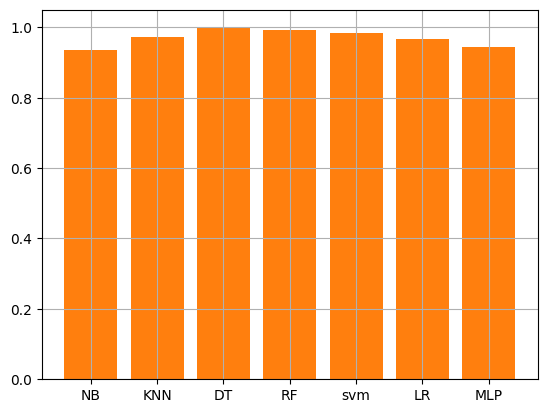

In [38]:
import matplotlib.pyplot as plt

acc_train =[acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title =["NB","KNN","DT","RF","svm","LR","MLP"]


plt.bar(title,acc_train)
plt.grid()
plt.show()